# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 93

Group Members:
- Zachary Samuel Tobing (13522016)

## Import Libraries

In [51]:
# # Installations (first time only)
# %pip install fancyimpute pandas numpy imblearn category_encoders

import pandas as pd
import numpy as np

# Import other libraries if needed
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from fancyimpute import KNN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 5.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 4.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 5.4 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 4.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 4.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Import Dataset

In [35]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# Train
df_tf_train = pd.read_csv('https://drive.google.com/uc?id=1Ha1Y7_MCdNxXM0RDkxAlpVF9yWe3m79x')
df_l_train = pd.read_csv('https://drive.google.com/uc?id=16wjQJUmKxbvvjLZyMzXGsFZGvu-QKNJ5')
df_ff_train = pd.read_csv('https://drive.google.com/uc?id=16Ohc1k1kDo651U8N2UqB0LfF7vhXs0yr')
df_cf_train = pd.read_csv('https://drive.google.com/uc?id=1OeM4aTjGQl_nLXtEy6nFaPFHfwHeax9U')
df_bf_train = pd.read_csv('https://drive.google.com/uc?id=1_Gmxe7BpTd8Ab9BYKJKXX1c6W1NPI_lq')
df_af_train = pd.read_csv('https://drive.google.com/uc?id=1FAW9k9bbNFmfCpUiPSf9BF8tsbQn1zEE')

# Test
df_tf_test = pd.read_csv('https://drive.google.com/uc?id=1ElOXUz-L2SI6G_QjkIz3JXLQ0ROgq_-U')
df_ff_test = pd.read_csv('https://drive.google.com/uc?id=18xitsdjfTEnIgV9yIevrN-T-9QhnOqzX')
df_cf_test = pd.read_csv('https://drive.google.com/uc?id=1lRIC6_hoe3ITxvBKLbG742pqK4KGixtV')
df_bf_test = pd.read_csv('https://drive.google.com/uc?id=1yyTih-U3No4kg9g0Ir9Kk6Kcs9vUVnby')
df_af_test = pd.read_csv('https://drive.google.com/uc?id=1iA9zKGIij041rs48kEr1eS1NlgfaRbqu')


# Final Combined Dataset

# Combine Train Set
df = pd.merge(df_tf_train,df_l_train, on='id', how='outer')
df = pd.merge(df,df_ff_train, on='id', how='outer')
df = pd.merge(df,df_cf_train, on='id', how='outer')
df = pd.merge(df,df_bf_train, on='id', how='outer')
df = pd.merge(df,df_af_train, on='id', how='outer')

# Combine Test Set
df_test = pd.merge(df_tf_test,df_ff_test, on='id', how='outer')
df_test = pd.merge(df_test,df_cf_test, on='id', how='outer')
df_test = pd.merge(df_test,df_bf_test, on='id', how='outer')
df_test = pd.merge(df_test,df_af_test, on='id', how='outer')

# Head
df.head()
df_test.head()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,proto,swin,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116,0,tcp,255.0,...,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0
1,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356,1,tcp,255.0,...,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,1.0,5.0
2,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691,2,tcp,255.0,...,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0
3,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,3,udp,0.0,...,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,1.0,4.0
4,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129,4,tcp,255.0,...,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,1.0,7.0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

1. Data Size:
Number of instances (rows): 175341
Number of features (columns): 44

Features (columns):
- sjit
- djit
- sinpkt
- dinpkt
- tcprtt
- synack
- ackdat
- id
- attack_cat
- label
- proto
- swin
- dwin
- stcpb
- dtcpb
- smean
- dmean
- trans_depth
- response_body_len
- state
- dur
- sbytes
- dbytes
- sttl
- dttl
- sloss
- dloss
- service
- sload
- dload
- spkts
- dpkts
- is_sm_ips_ports
- ct_state_ttl
- ct_flw_http_mthd
- is_ftp_login
- ct_ftp_cmd
- ct_srv_src
- ct_srv_dst
- ct_dst_ltm
- ct_src_ltm
- ct_src_dport_ltm
- ct_dst_sport_ltm
- ct_dst_src_ltm

2. Feature Data Types

Pure Data Types:

sjit                   float
djit                   float
sinpkt                 float
dinpkt                 float
tcprtt                 float
synack                 float
ackdat                 float
id                   integer
attack_cat            string
label                integer
proto                 string
swin                   float
dwin                   float
stcpb         

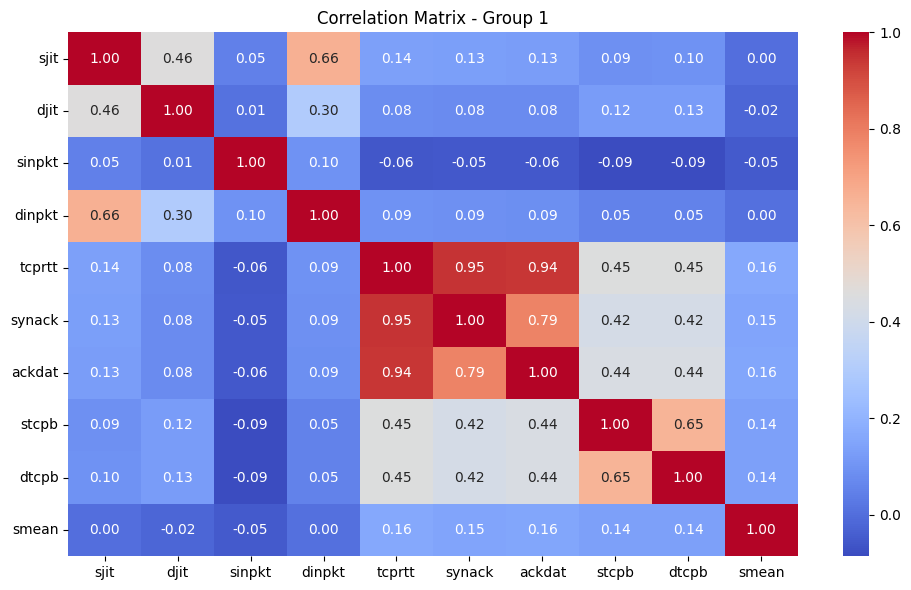


Correlation Matrix - Group 2:


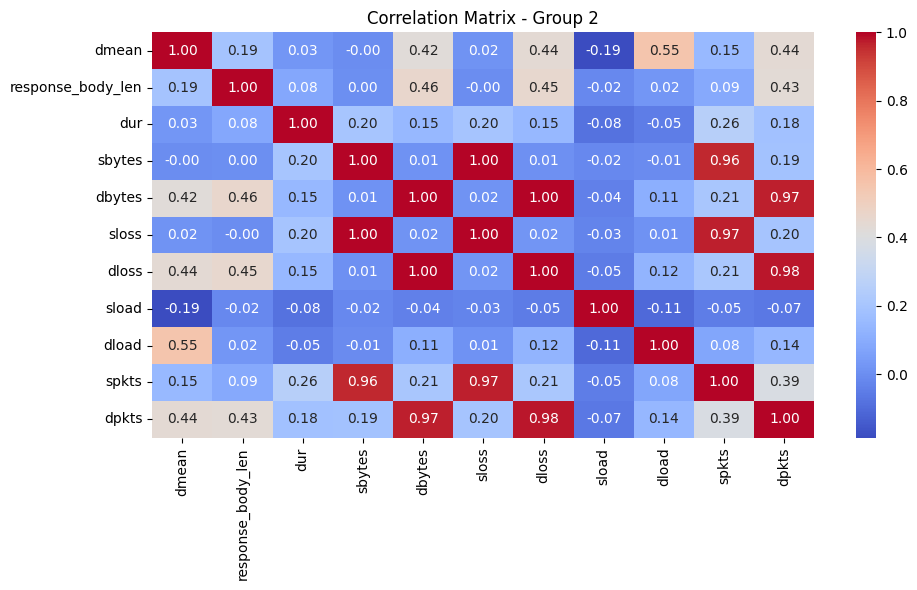


Numerical Feature Distributions:


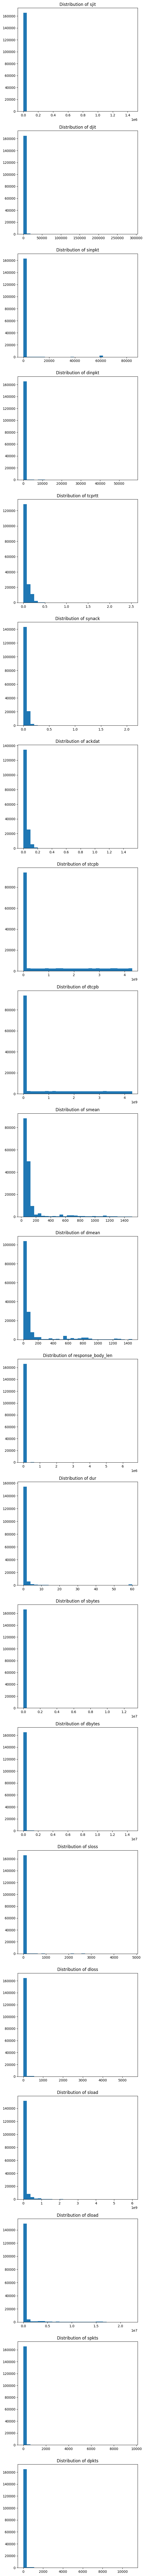


Categorical Feature Distributions:


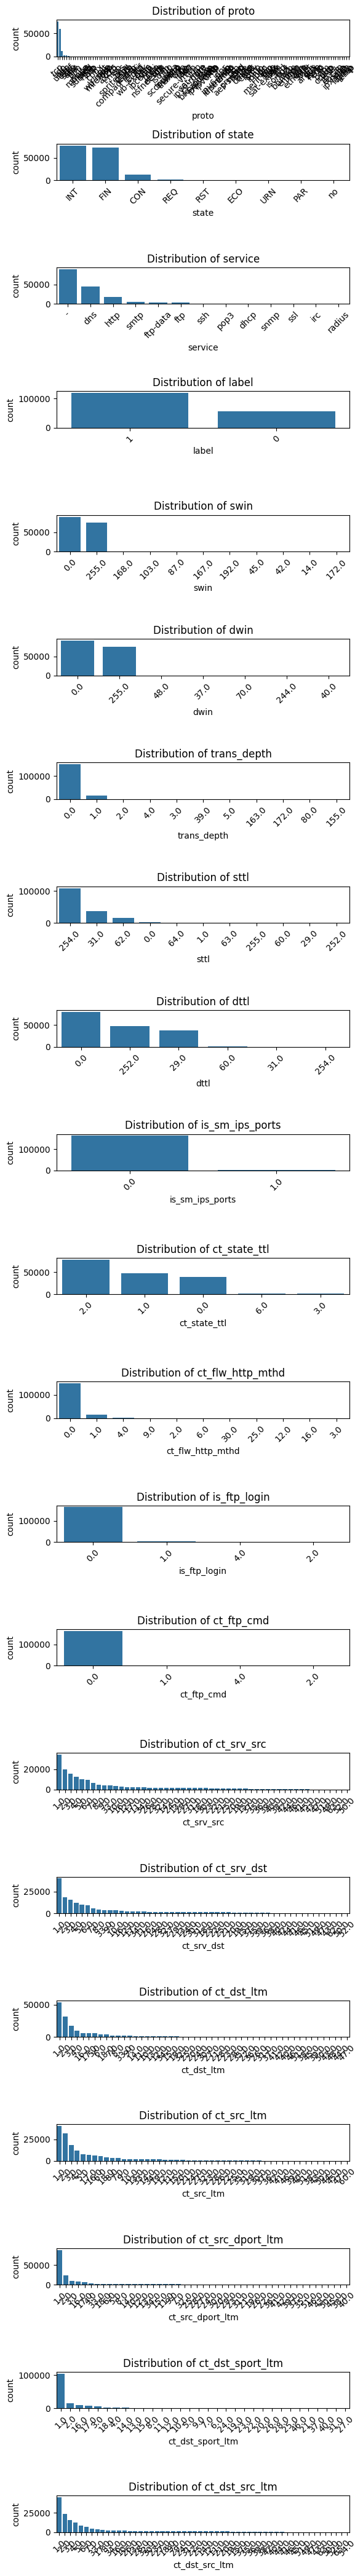


Feature vs Target:



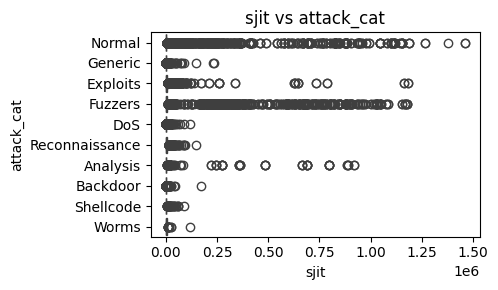

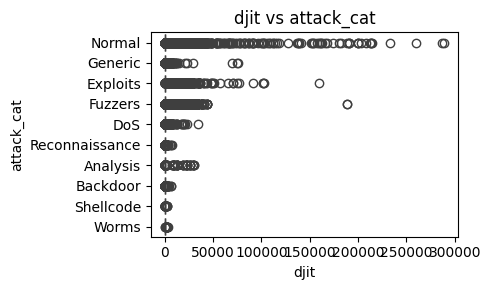

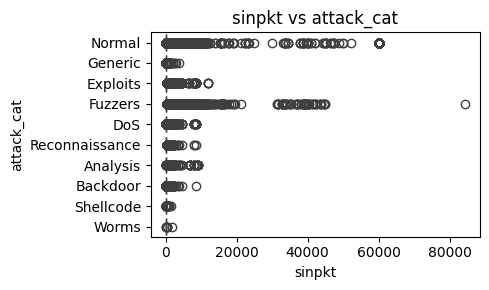

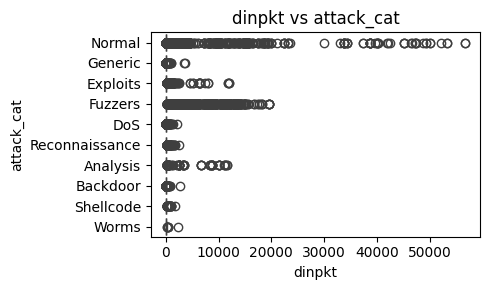

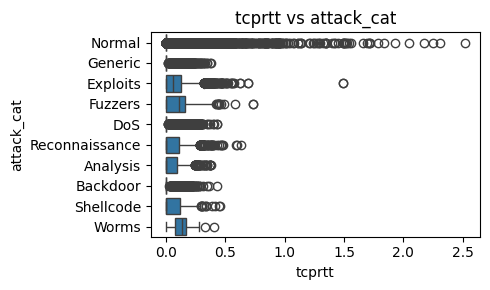

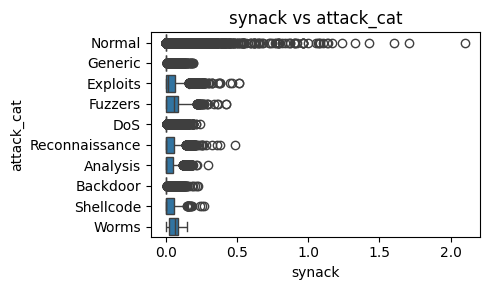

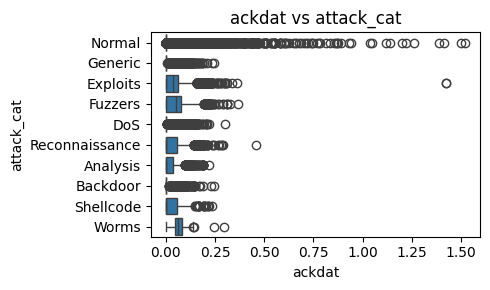

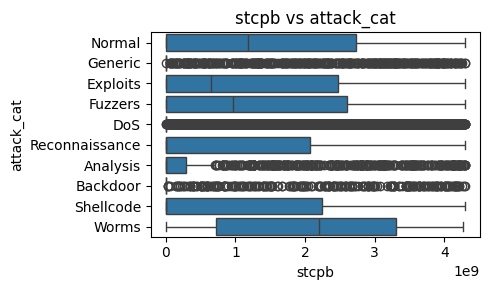

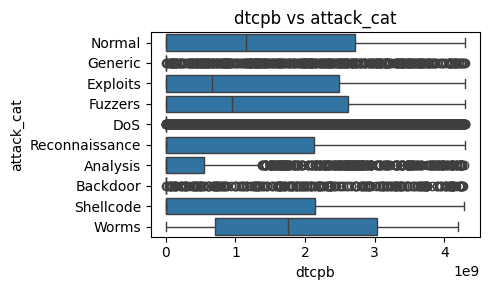

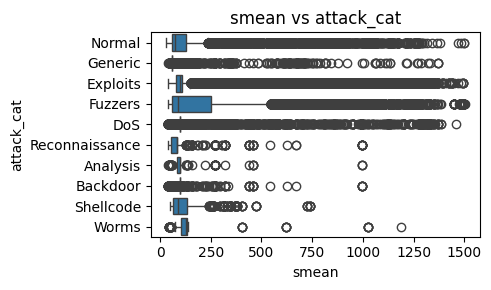

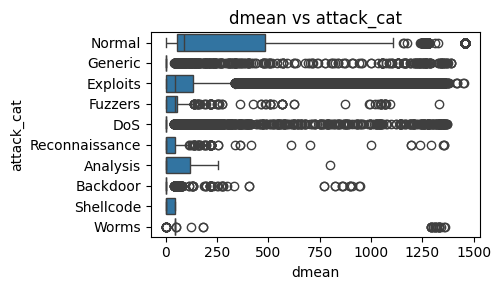

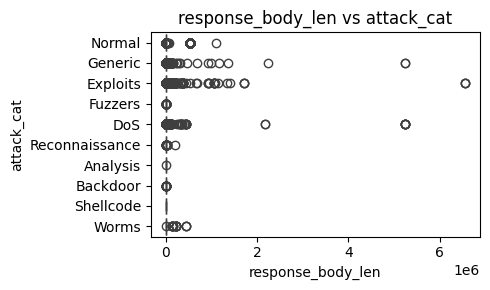

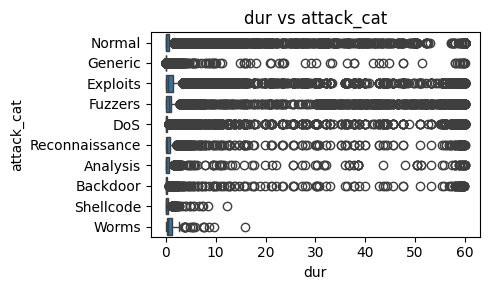

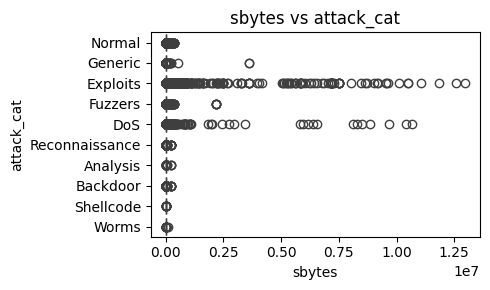

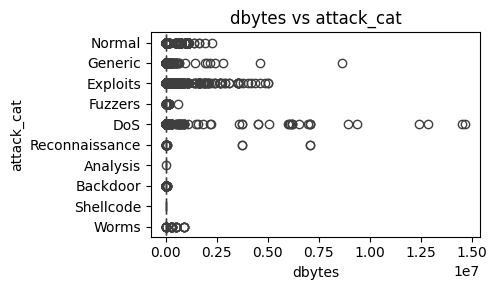

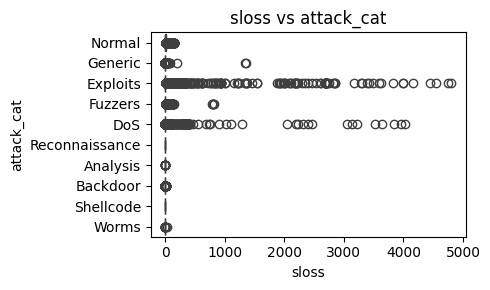

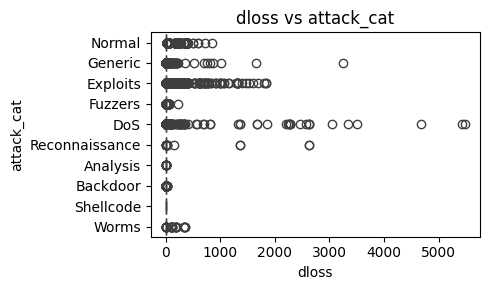

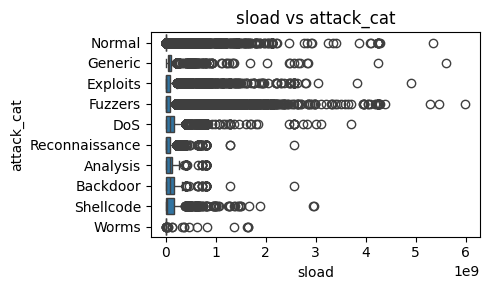

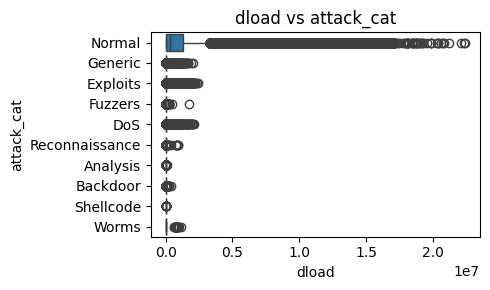

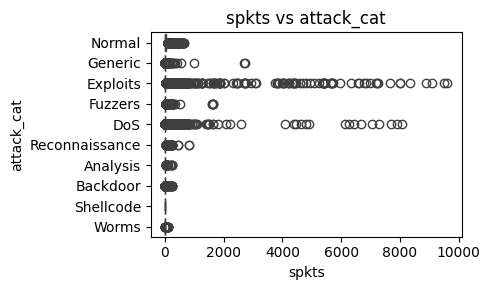

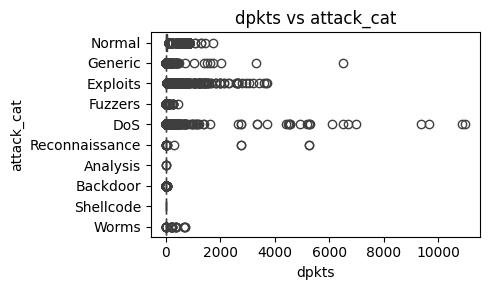

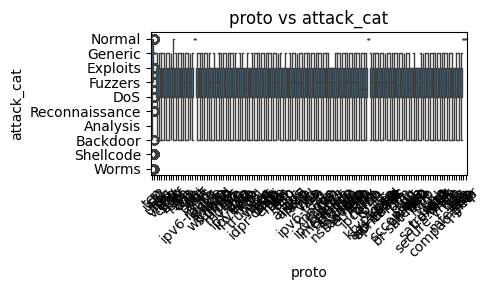

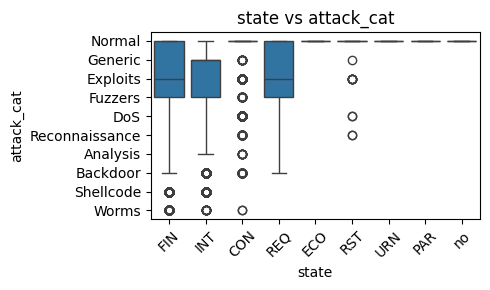

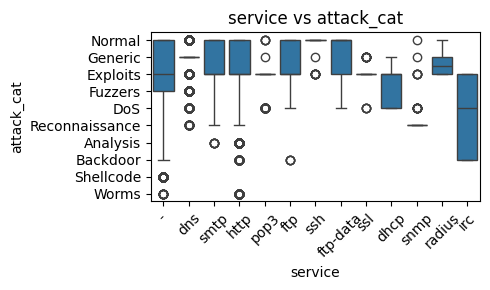

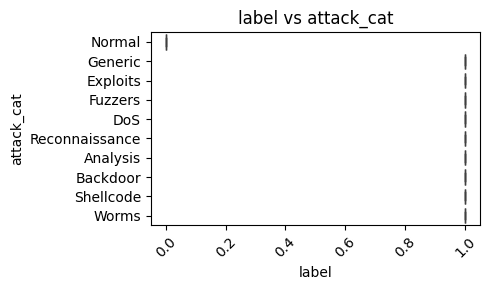

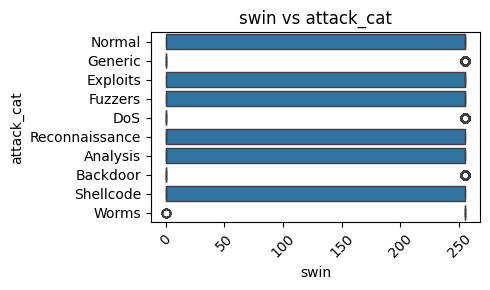

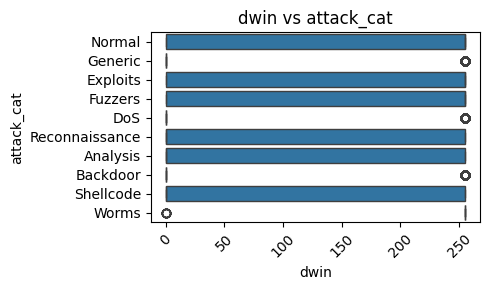

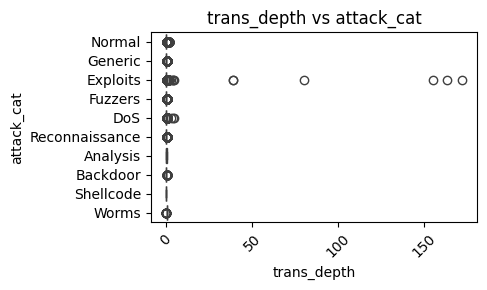

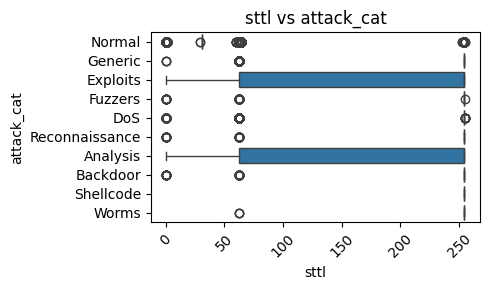

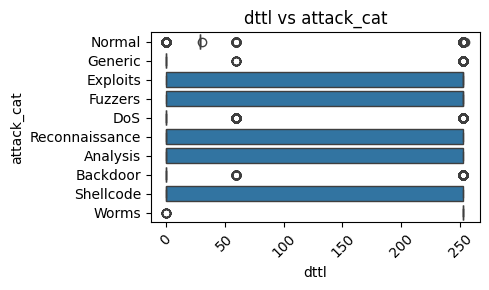

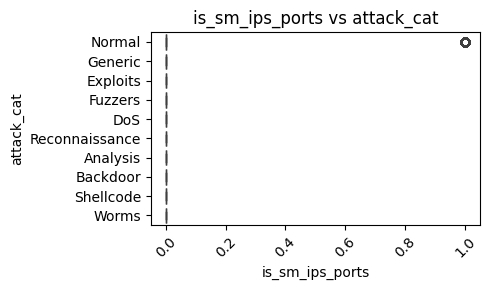

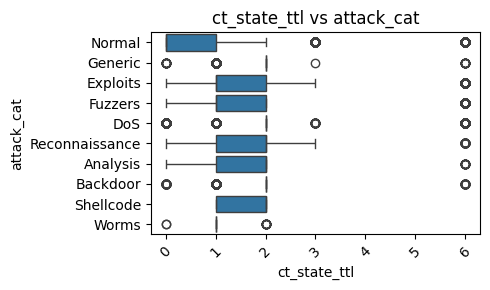

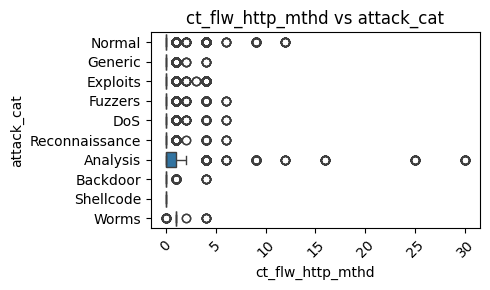

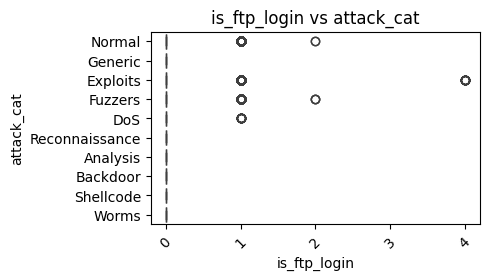

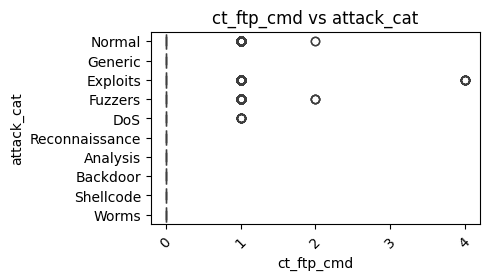

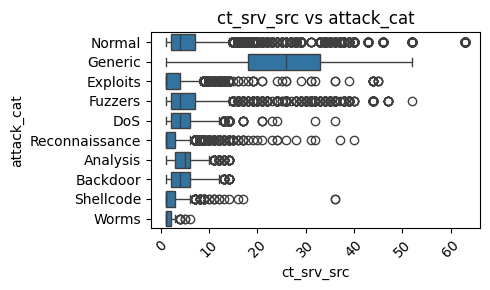

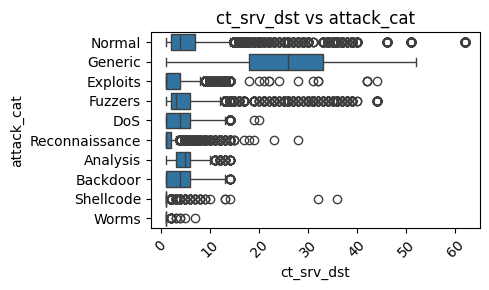

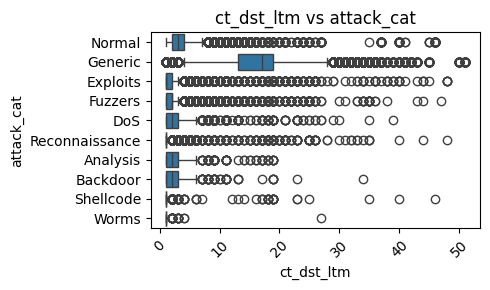

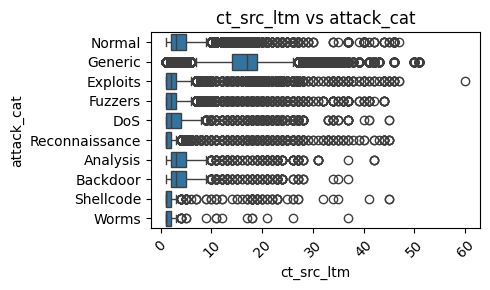

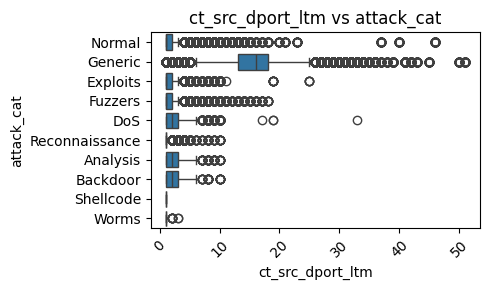

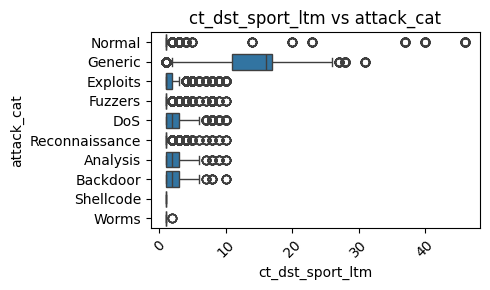

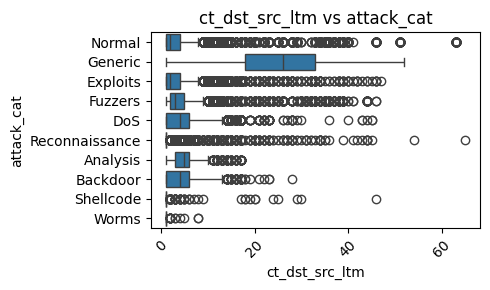

In [38]:
# 1. Data Size
print("1. Data Size:")

# DataFrame shape
num_rows, num_columns = df.shape
print(f"Number of instances (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")

# Feature list
print("\nFeatures (columns):")
for col in df.columns:
    print(f"- {col}")

# 2. Feature Data Types
print("\n2. Feature Data Types")

# Pure data types (integer, float, string, boolean)
print("\nPure Data Types:\n")

# Mapping data types for better reading
data_type_mapping = {
    'int64': 'integer',
    'float64': 'float',
    'object': 'string',
    'bool': 'boolean'
}

# Apply to dtypes for better reading
data_types = df.dtypes.apply(lambda x: data_type_mapping.get(str(x), str(x)))
print(data_types)

# Numerical vs Categorical
print("\nNumeric vs Categorical\n")

# Basic Filtering from Pandas function
print("\nBasic Filtering:\n")

# List
numerical_columns = list(df.select_dtypes(include=['number']).columns)
categorical_columns = list(df.select_dtypes(exclude=['number']).columns)
categorical_columns.remove("attack_cat")
numerical_columns.remove("id")

# DataFrame
numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]

print("\nNumerical Features:")
for col in numerical_columns:
    print(f"- {col}")

print("\nCategorical Features:")
for col in categorical_columns:
    print(f"- {col}")

# Get unique value counts for each numerical column for further inspection
print("\nNumerical Value Counts (Inspection):\n")
unique_counts = {col: df[col].nunique() for col in numerical_columns}
print(unique_counts)

updated_numerical_columns = []
for col in numerical_columns:
    if df[col].nunique() < 100:
        categorical_columns.append(col)
    else:
        updated_numerical_columns.append(col)
numerical_columns = updated_numerical_columns

# DataFrame
numerical_df = df[numerical_columns]
categorical_df = df[categorical_columns]

# --- 1. Separate Correlation Matrices ---
print("\nSeparate Correlation Matrices:")
num_cols = len(numerical_columns)
# Split numerical columns into two groups (can adjust based on needs)
mid_point = num_cols // 2
group1 = numerical_columns[:mid_point]
group2 = numerical_columns[mid_point:]

# Correlation for Group 1
print("\nCorrelation Matrix - Group 1:")
correlation_matrix1 = numerical_df[group1].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Group 1")
plt.tight_layout()
plt.show()

# Correlation for Group 2
print("\nCorrelation Matrix - Group 2:")
correlation_matrix2 = numerical_df[group2].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Group 2")
plt.tight_layout()
plt.show()

# --- 2. Fix Scale for Data Distribution Plotting ---

# Numerical Features (Histogram)
print("\nNumerical Feature Distributions:")
num_cols = len(numerical_columns)
if num_cols > 0:
    plt.figure(figsize=(6, num_cols * 5))  # Dynamic scaling
    for idx, col in enumerate(numerical_columns, 1):
        plt.subplot(num_cols, 1, idx)
        
        # Calculate histogram
        hist, bin_edges = np.histogram(numerical_df[col].dropna(), bins=30)
        
        # Remove bins with zero frequency
        non_zero_bins = hist > 0
        
        # Filter bin edges and histogram counts
        filtered_bin_edges = bin_edges[:-1][non_zero_bins]  # Exclude last bin edge
        filtered_hist = hist[non_zero_bins]

        # Plot histogram
        plt.bar(filtered_bin_edges, filtered_hist, width=np.diff(filtered_bin_edges)[0], align='edge')
        
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
    plt.show()
else:
    print("No numerical columns with data available.")

# Categorical Features (Bar Graph)
print("\nCategorical Feature Distributions:")
num_cats = len(categorical_columns)
if num_cats > 0:
    plt.figure(figsize=(6, num_cats * 2))  # Dynamic scaling
    for idx, col in enumerate(categorical_columns, 1):
        plt.subplot(num_cats, 1, idx)
        # Count the occurrences of each category
        counts = categorical_df[col].value_counts()
        # Filter categories with non-zero counts
        non_zero_categories = counts[counts > 0].index
        sns.countplot(data=categorical_df, x=col, order=non_zero_categories)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with data available.")


# Feature vs Target
print("\nFeature vs Target:\n")
target = 'attack_cat'

# Numeric/Continuous (scatter)
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

# Categorical (box)
for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [39]:
# Normal Splitting

# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Assume `df` is your DataFrame and `target_column` is the target variable
target_column = 'attack_cat' 

# Separate features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Split the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [40]:
def mean_imputation(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

for col in numerical_columns:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

def mode_imputation(df, numerical_columns, categorical_columns):
    # Handle non-numeric columns (e.g., fill missing values with mode)
    for col in categorical_columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

# Handle non-numeric columns (e.g., fill missing values with mode)
for col in categorical_columns:
    mode_value = X[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Display the DataFrame after imputation
print("\nDataFrame after Imputation:")
display(df)


DataFrame after Imputation:


,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,attack_cat,label,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,4449.110313,3234.831566,11.845558,6.261361,0.041331,0.000444,0.000114,0,Normal,0,...,0.0,0.0,0.0,11.0,1.0,5.0,4.0,2.0,1.0,5.0
1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,0.020402,1,Generic,1,...,0.0,0.0,0.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0
2,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,2,Exploits,1,...,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0
3,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,0.020402,3,Normal,0,...,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0
4,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,4,Normal,0,...,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,175336,Generic,1,...,0.0,0.0,0.0,38.0,38.0,32.0,1.0,32.0,16.0,38.0
175337,15464.286700,531.848125,193.445428,209.600766,0.066524,0.047738,0.018786,175337,Exploits,1,...,0.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0
175338,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,175338,Generic,1,...,0.0,0.0,0.0,33.0,33.0,16.0,16.0,16.0,16.0,33.0
175339,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000,0.020402,175339,Generic,1,...,0.0,0.0,0.0,36.0,36.0,1.0,37.0,36.0,23.0,36.0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [14]:
# Clipping (numerical)

skewness = df[numerical_columns].skew()
for col in numerical_columns:
    col_skewness = skewness[col]

    if col_skewness > 0:  # Right-skewed (positive skew)
        # Increase lower limit and relax the upper limit based on skewness
        lower_limit = df[col].quantile(0.05) + 0.5 * col_skewness
        upper_limit = df[col].quantile(0.95) + 1.5 * (df[col].quantile(0.95) - df[col].quantile(0.5))
    elif col_skewness < 0:  # Left-skewed (negative skew)
        # Increase upper limit and relax the lower limit based on skewness
        upper_limit = df[col].quantile(0.95) - 0.5 * abs(col_skewness)
        lower_limit = df[col].quantile(0.05) - 1.5 * (df[col].quantile(0.5) - df[col].quantile(0.05))
    else:  # Symmetric (skew = 0)
        # Use 3-sigma rule (mean ± 3 * std deviation)
        upper_limit = df[col].mean() + 3 * df[col].std()
        lower_limit = df[col].mean() - 3 * df[col].std()

    # Clip the values based on calculated limits
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [41]:
# Removing duplicates

def remove_duplicates(df):
    print("Original DataFrame:")
    print(df)

    # Remove duplicate rows
    df = df.drop_duplicates()

# Remove duplicate rows
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df)


DataFrame after removing duplicates:
                sjit         djit      sinpkt      dinpkt    tcprtt    synack  \
0        4449.110313  3234.831566   11.845558    6.261361  0.041331  0.000444   
1           0.000000     0.000000    0.009000    0.000000  0.000000  0.000000   
2        8561.040438   249.950547  165.386453  172.345750  0.158826  0.057902   
3        4053.086020  2918.730804    8.669644    4.496707  0.000558  0.000448   
4           0.000000     0.000000    0.008000    0.007000  0.000000  0.000000   
...              ...          ...         ...         ...       ...       ...   
175336      0.000000     0.000000    0.005000    0.000000  0.000000  0.000000   
175337  15464.286700   531.848125  193.445428  209.600766  0.066524  0.047738   
175338      0.000000     0.000000    0.008000    0.000000  0.000000  0.000000   
175339      0.000000     0.000000    0.004000    0.000000  0.000000  0.000000   
175340      0.000000     0.000000    0.009000    0.000000  0.000000  0.

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [42]:
# Feature Selection based on correlation threshold

# Calculate the correlation of each feature with the target
target_column = 'attack_cat'

# Encode target values numerically 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_values = le.fit_transform(df[target_column])

threshold = 0.1
correlations = {}

for column in numerical_columns:
    if column != target_column:  # Skip the target column itself
        correlations[column] = abs(np.corrcoef(df[column], target_values)[0, 1])

# Select features with correlation above the threshold
selected_features = [feature for feature, corr in correlations.items() if corr >= threshold]

# Return the dataset with selected features
selected_df = df[selected_features]

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [43]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class RobustScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.median_ = None
        self.iqr_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X) 
        self.median_ = X.median()
        self.iqr_ = X.quantile(0.75) - X.quantile(0.25)
        return self

    def transform(self, X):
        """
        Scale the data using the median and IQR.

        Parameters:
            X (pd.DataFrame): The input data to scale.

        Returns:
            pd.DataFrame: The scaled data.
        """
        X = pd.DataFrame(X)  # Ensure compatibility with both DataFrame and arrays
        X_scaled = (X - self.median_) / self.iqr_
        return X_scaled

# # Example Usage
# if __name__ == "__main__":
#     # Simulated dataset
#     data = {
#         "feature1": [1, 2, 3, 4, 100],  # Contains an outlier
#         "feature2": [10, 20, 30, 40, 50],
#     }
#     df = pd.DataFrame(data)

#     # Initialize the scaler
#     scaler = RobustScaler()

#     # Fit the scaler
#     scaler.fit(df)

#     # Transform the data
#     df_scaled = scaler.transform(df)

#     print("Original Data:")
#     print(df)
#     print("\nScaled Data:")
#     print(df_scaled)


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.encoding_map = {}

    def fit(self, X, y=None):
        if y is None:
            y = X[self.target_col]

        self.encoding_map = {}
        for col in X.select_dtypes(include=['object', 'category']).columns:
            encoding = X.groupby(col)[self.target_col].mean()
            self.encoding_map[col] = encoding

        return self

    def transform(self, X):
        X_transformed = X.copy()

        for col, encoding in self.encoding_map.items():
            X_transformed[col] = X_transformed[col].map(encoding).fillna(0)  # Fill NaN with 0 if unseen category

        return X_transformed

# # Example Usage:
# data = {
#     'Feature1': ['A', 'A', 'B', 'B', 'C'],
#     'Feature2': ['X', 'Y', 'X', 'Y', 'X'],
#     'attack_cat': [1, 0, 1, 0, 1]
# }
# df = pd.DataFrame(data)

# # Split features and target
# X = df[['Feature1', 'Feature2']]
# y = df['attack_cat']

# # Combine X and y for target encoding (or pass y separately)
# X['attack_cat'] = y

# # Initialize and apply TargetEncoder
# encoder = TargetEncoder(target_col='attack_cat')
# encoder.fit(X)
# X_encoded = encoder.transform(X)

# print("Original DataFrame:")
# print(df)
# print("\nTarget-Encoded DataFrame:")
# print(X_encoded)


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

class SMOTEOversampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', random_state=None):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.smote = None

    def fit(self, X, y=None):
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled


class TomekLinksUndersampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto'): 
        self.sampling_strategy = sampling_strategy
        self.tomek_links = None

    def fit(self, X, y=None):
        self.tomek_links = TomekLinks(sampling_strategy=self.sampling_strategy)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.tomek_links.fit_resample(X, y)
        return X_resampled, y_resampled

# # Example Usage
# if __name__ == "__main__":
#     import numpy as np
#     import pandas as pd
#     from sklearn.datasets import make_classification

#     # Generate a synthetic imbalanced dataset
#     X, y = make_classification(
#         n_classes=2, 
#         class_sep=2, 
#         weights=[0.9, 0.1], 
#         n_informative=3, 
#         n_redundant=1, 
#         flip_y=0, 
#         n_features=5, 
#         n_clusters_per_class=1, 
#         n_samples=1000, 
#         random_state=42
#     )

    # # Convert to DataFrame for compatibility
    # X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
    # y = pd.Series(y, name="target")

    # # Apply SMOTE for oversampling
    # smote_oversampler = SMOTEOversampler(random_state=42)
    # X_smote, y_smote = smote_oversampler.fit_transform(X, y)

    # print("Original dataset shape:", y.value_counts().to_dict())
    # print("After SMOTE oversampling:", pd.Series(y_smote).value_counts().to_dict())

    # # Apply Tomek Links for undersampling
    # tomek_undersampler = TomekLinksUndersampler()
    # X_tomek, y_tomek = tomek_undersampler.fit_transform(X_smote, y_smote)

    # print("After Tomek Links undersampling:", pd.Series(y_tomek).value_counts().to_dict())


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

class SMOTEOversampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', random_state=None):
        self.sampling_strategy = sampling_strategy
        self.random_state = random_state
        self.smote = None

    def fit(self, X, y=None):
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy, random_state=self.random_state)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled


class TomekLinksUndersampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto'): 
        self.sampling_strategy = sampling_strategy
        self.tomek_links = None

    def fit(self, X, y=None):
        self.tomek_links = TomekLinks(sampling_strategy=self.sampling_strategy)
        return self

    def transform(self, X, y):
        X_resampled, y_resampled = self.tomek_links.fit_resample(X, y)
        return X_resampled, y_resampled

# # Example Usage
# if __name__ == "__main__":
#     import numpy as np
#     import pandas as pd
#     from sklearn.datasets import make_classification

#     # Generate a synthetic imbalanced dataset
#     X, y = make_classification(
#         n_classes=2, 
#         class_sep=2, 
#         weights=[0.9, 0.1], 
#         n_informative=3, 
#         n_redundant=1, 
#         flip_y=0, 
#         n_features=5, 
#         n_clusters_per_class=1, 
#         n_samples=1000, 
#         random_state=42
#     )

#     # Convert to DataFrame for compatibility
#     X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
#     y = pd.Series(y, name="target")

#     # Apply SMOTE for oversampling
#     smote_oversampler = SMOTEOversampler(random_state=42)
#     X_smote, y_smote = smote_oversampler.fit_transform(X, y)

#     print("Original dataset shape:", y.value_counts().to_dict())
#     print("After SMOTE oversampling:", pd.Series(y_smote).value_counts().to_dict())

#     # Apply Tomek Links for undersampling
#     tomek_undersampler = TomekLinksUndersampler()
#     X_tomek, y_tomek = tomek_undersampler.fit_transform(X_smote, y_smote)

#     print("After Tomek Links undersampling:", pd.Series(y_tomek).value_counts().to_dict())


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [47]:
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin

class PCAImplementation(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = None

    def fit(self, X, y=None):
        self.pca = PCA(n_components=self.n_components)
        self.pca.fit(X)
        return self

    def transform(self, X, y=None):
        X_transformed = self.pca.transform(X)
        return X_transformed


# # Example Usage
# if __name__ == "__main__":
#     import numpy as np
#     import pandas as pd
#     from sklearn.datasets import make_classification

#     # Generate a synthetic dataset
#     X, y = make_classification(
#         n_classes=2,
#         class_sep=2,
#         weights=[0.9, 0.1],
#         n_informative=3,
#         n_redundant=1,
#         flip_y=0,
#         n_features=5,
#         n_clusters_per_class=1,
#         n_samples=1000,
#         random_state=42
#     )

#     # Convert to DataFrame for compatibility
#     X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
#     y = pd.Series(y, name="target")

#     # Apply PCA for dimensionality reduction
#     pca_transformer = PCAImplementation(n_components=2)
#     X_pca = pca_transformer.fit_transform(X)

#     print("Original dataset shape:", X.shape)
#     print("After PCA transformation:", X_pca.shape)


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([()    ('smote', SMOTEOversampler(random_state=42)),
#     ('tomek_links', TomekLinksUndersampler()),
#     ('pca', PCAImplementation(n_components=2))])

# train_set = pipe.fit_transform(df)
# val_set = pipe.transform(df_test)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA

# Define the numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = X_train.select_dtypes(include=[object, 'category']).columns

# Initialize preprocessors for numerical and categorical data
imputer = SimpleImputer(strategy='mean')  # Imputation for missing numerical data
scaler = RobustScaler()  # Robust scaling for numerical data
encoder = TargetEncoder()  # Target encoding for categorical data
pca = PCA(n_components=5)  # PCA for dimensionality reduction

# Step 1: Preprocessing for numerical data
X_train_numerical = X_train[numerical_columns]
X_train_imputed = imputer.fit_transform(X_train_numerical)  # Impute missing values
X_train_scaled = scaler.fit_transform(X_train_imputed)  # Scale numerical data
X_train_pca = pca.fit_transform(X_train_scaled)  # Apply PCA for dimensionality reduction

# Step 2: Preprocessing for categorical data
X_train_categorical = X_train[categorical_columns]
X_train_encoded = encoder.fit_transform(X_train_categorical)  # Encode categorical data

# Combine numerical and categorical processed data
X_train_final = np.hstack([X_train_pca, X_train_encoded.values])  # Concatenate after PCA and encoding

# Apply the same preprocessing steps to the test data

# Step 1: Preprocessing for numerical data in the test set
X_test_numerical = df_test[numerical_columns]
X_test_imputed = imputer.transform(X_test_numerical)  # Impute missing values using the already fitted imputer
X_test_scaled = scaler.transform(X_test_imputed)  # Scale numerical data using the fitted scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA using the fitted PCA model

# Step 2: Preprocessing for categorical data in the test set
X_test_categorical = df_test[categorical_columns]
X_test_encoded = encoder.transform(X_test_categorical)  # Encode categorical data using the fitted encoder

# Combine numerical and categorical processed data in the test set
X_test_final = np.hstack([X_test_pca, X_test_encoded.values])  # Concatenate after PCA and encoding


TypeError: fit_transform() missing argument: y

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [2]:
import numpy as np

# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Calculate distances from the test point to all training points
            distances = [euclidean_distance(test_point, x) for x in self.X_train]
            # Get the indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            k_labels = [self.y_train[i] for i in k_indices]
            # Majority voting for classification
            most_common = Counter(k_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

# # Example dataset
# X_train = np.array([
#     [1, 2],  # Class 0
#     [2, 3],  # Class 0
#     [3, 4],  # Class 1
#     [6, 7]   # Class 1
# ])

# y_train = np.array([0, 0, 1, 1])

# X_test = np.array([
#     [1.5, 2.5],  # Expected Class 0 (closer to class 0 points)
#     [5, 6]       # Expected Class 1 (closer to class 1 points)
# ])

# # Initialize and train the KNN model
# knn = KNN(k=3)
# knn.fit(X_train, y_train)

# # Make predictions
# predictions = knn.predict(X_test)

# # Print predictions
# print("Predictions:", predictions)

Predictions: [0 1]


## B. Naive Bayes

In [7]:
import pandas as pd
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.conditional_probs = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = y.unique()

        for c in self.classes:
            # Calculate the prior probability for each class
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)

            # Calculate the conditional probabilities for each feature given the class
            feature_probs = {}
            for column in X.columns:
                feature_probs[column] = X_c[column].value_counts(normalize=True).to_dict()

            self.conditional_probs[c] = feature_probs

    def predict(self, X):
        predictions = []

        for _, row in X.iterrows():
            class_probs = {}

            for c in self.classes:
                # Start with the prior probability for the class
                class_probs[c] = np.log(self.priors[c])

                # Multiply by the conditional probabilities for each feature
                for column in X.columns:
                    feature_val = row[column]
                    if feature_val in self.conditional_probs[c][column]:
                        class_probs[c] += np.log(self.conditional_probs[c][column][feature_val])
                    else:
                        # Laplace smoothing for unseen feature values
                        total_values = len(self.conditional_probs[c][column])
                        class_probs[c] += np.log(1 / (total_values + len(X)))

            # Predict the class with the highest probability
            predictions.append(max(class_probs, key=class_probs.get))

        return predictions

# # Example usage:
# data = {
#     'Feature1': ['A', 'A', 'B', 'B', 'A', 'B', 'A', 'B'],
#     'Feature2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'Y', 'X'],
#     'Label': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
# }
# df = pd.DataFrame(data)

# X = df[['Feature1', 'Feature2']]
# y = df['Label']

# nb = NaiveBayes()
# nb.fit(X, y)

# # Predict on new data
# test_data = pd.DataFrame({
#     'Feature1': ['A', 'B'],
#     'Feature2': ['X', 'Y']
# })
# predictions = nb.predict(test_data)
# print("Predictions:", predictions)

## C. ID3

In [3]:
import pandas as pd
import numpy as np
from collections import Counter

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count / total) * np.log2(count / total) for count in counts.values())

# Function to calculate the information gain
def information_gain(X, y, feature):
    total_entropy = entropy(y)
    
    # Split the dataset based on the feature values
    values = X[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = y[X[feature] == value]
        weighted_entropy += (len(subset) / len(y)) * entropy(subset)
    
    return total_entropy - weighted_entropy

# ID3 Decision Tree Classifier
class ID3:
    def __init__(self):
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y):
        # If all labels are the same, return the label
        if len(set(y)) == 1:
            return y.iloc[0]
        
        # If no features left to split, return the most common label
        if len(X.columns) == 0:
            return Counter(y).most_common(1)[0][0]
        
        # Select the feature with the highest information gain
        best_feature = max(X.columns, key=lambda feature: information_gain(X, y, feature))
        
        # Create a subtree for each possible value of the best feature
        tree = {best_feature: {}}
        values = X[best_feature].unique()
        for value in values:
            subset_X = X[X[best_feature] == value].drop(columns=[best_feature])
            subset_y = y[X[best_feature] == value]
            tree[best_feature][value] = self._build_tree(subset_X, subset_y)
        
        return tree

    def predict(self, X):
        return X.apply(self._predict_single, axis=1)

    def _predict_single(self, row):
        tree = self.tree
        while isinstance(tree, dict):
            feature = list(tree.keys())[0]
            value = row[feature]
            tree = tree[feature].get(value, None)
        return tree

# # Example usage and testing
# data = {
#     'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
#     'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
#     'Humidity': ['High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low'],
#     'Windy': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
#     'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
# }
# df = pd.DataFrame(data)

# X = df.drop(columns=['PlayTennis'])
# y = df['PlayTennis']

# # Initialize and train the ID3 classifier
# id3 = ID3()
# id3.fit(X, y)

# # Predict on the same data (usually you'd predict on new unseen data)
# predictions = id3.predict(X)

# # Print predictions
# print("Predictions:", predictions.tolist())


Predictions: ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [55]:
# Initialize the custom classes
imputer = SimpleImputer(strategy='mean')  # Using your custom imputer
scaler = RobustScaler()  # Custom RobustScaler
encoder = TargetEncoder()  # Custom TargetEncoder
pca = PCA(n_components=5)  # PCA for dimensionality reduction

# Define numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=[np.number]).columns
categorical_columns = X_train.select_dtypes(include=[object, 'category']).columns

# Step-by-step transformations for numerical columns
X_train_numerical = X_train[numerical_columns]
X_train_imputed = imputer.fit_transform(X_train_numerical)  # Imputation
X_train_scaled = scaler.fit_transform(X_train_imputed)  # Scaling
X_train_pca = pca.fit_transform(X_train_scaled)  # PCA

# Step-by-step transformations for categorical columns
X_train_categorical = X_train[categorical_columns]
X_train_encoded = encoder.fit_transform(X_train_categorical)  # Encoding

# Combine the transformed numerical and categorical columns
X_train_final = np.hstack([X_train_pca, X_train_encoded.values])  # Combine after PCA and encoding

# Apply the same transformations to the test data

# Numerical columns in test data
X_test_numerical = df_test[numerical_columns]
X_test_imputed = imputer.transform(X_test_numerical)  # Only transform, not fit
X_test_scaled = scaler.transform(X_test_imputed)  # Only transform, not fit
X_test_pca = pca.transform(X_test_scaled)  # Only transform, not fit

# Categorical columns in test data
X_test_categorical = df_test[categorical_columns]
X_test_encoded = encoder.transform(X_test_categorical)  # Only transform, not fit

# Combine the transformed numerical and categorical columns for the test data
X_test_final = np.hstack([X_test_pca, X_test_encoded.values])  # Combine after PCA and encoding

# Initialize the KNN model
knn = KNN(k=3)

# Train the KNN model
knn.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_final)

# Prepare the submission file (assuming df_test has an 'id' column)
submission = pd.DataFrame({
    'id': df_test['id'],  # Replace with the appropriate column name for test set IDs
    'attack_cat': y_pred  # The predicted target variable
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Print out some of the predictions
print("Predictions:", y_pred)

TypeError: fit_transform() missing argument: y

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

1. Cleaning
	Dalam pemrosesan tahapan cleaning, banyak sekali faktor yang harus dipertimbangkan. Dari domain, sifat data, kemampuan algoritma, sumber daya yang dibutuhkan, dsb. Langkah-langkah yang digunakan seharusnya bisa ditentukan yang terbaik, terlepas dari semua batasan yang ada seperti durasi pemrosesannya.
	Setiap langkah dapat diperbaiki dan ditingkatkan, dicari kombinasi dari metode yang sesuai untuk mencapai data yang terbaik untuk dipelajari. Akan tetapi, dapat sekilas diasumsikan dan dilihat bahwa penanganan missing data dengan mean untuk numerical dan mode untuk categorical terlalu menyederhanakan dan tidak merefleksikan data yang sebenarnya.
	Parameter dalam penanganan outlier dengan menggunakan clipping juga kurang ideal karena kebutuhan parameternya untuk perhitungan tidak dapat dengan pasti dihitung dan ditentukan. Fitur yang memiliki korelasi rendah dengan target belum tentu tidak relevan.
2. Preprocessing
	Dengan jawaban serupa, banyak sekali metode yang dapat digunakan untuk memproses datanya. Hal yang dapat langsung terlihat yaitu ketika split biasa tidak cukup, melainkan perlu dicobanya k-fold splitting untuk hasil yang lebih baik.